In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import boxcox

In [2]:
#Loaded Libraries

In [3]:
ASI_Base = pd.read_csv('C:/Users/matth/Desktop/Week-4-Analysis/ASI_Base.csv')

In [4]:
#Loaded Data

In [5]:
ASI_Base.head()

,Unnamed: 0,Year,Age,Gender,C1,C2,C3,C4,CTotal,DHEA,IF,INF,P17-OH,TotalIgA,GIgA,RandID
0,0,10,42,F,19.0,6,4.0,5.0,34,1.0,3.0,3.0,49.0,5.0,23.0,9383480749
1,1,11,60,F,12.0,7,4.0,7.0,30,2.0,3.0,22.0,15.0,7.0,5.0,2705809722
2,2,14,49,F,11.0,1,1.0,1.0,14,3.0,3.0,3.0,30.0,5.0,1.0,517281238
3,3,14,35,F,12.0,3,6.0,1.0,22,6.0,15.0,18.0,33.0,16.0,4.0,2356075951
4,4,13,53,F,20.0,7,4.0,3.0,34,5.0,3.0,7.0,9.0,5.0,13.0,9137475714


In [7]:
ASI_Base1 = ASI_Base[['Age','C4']]

In [8]:
ASI_Base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     255 non-null    int64  
 1   C4      253 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [11]:
#DROP NA Values

In [10]:
ASI_Base1.dropna(inplace=True)

<ipython-input-10-a356c9faf015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1.dropna(inplace=True)


In [12]:
#Convert C4 into Integer

In [13]:
ASI_Base1['C4'] = ASI_Base1['C4'].astype(int)

<ipython-input-13-c06d5fb40014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C4'] = ASI_Base1['C4'].astype(int)


In [14]:
ASI_Base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 0 to 254
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     253 non-null    int64
 1   C4      253 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 4.9 KB


In [16]:
ASI_Base1['C4LOG'] = np.log(ASI_Base1['C4'])

<ipython-input-16-2b8eed9576de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ASI_Base1['C4LOG'] = np.log(ASI_Base1['C4'])


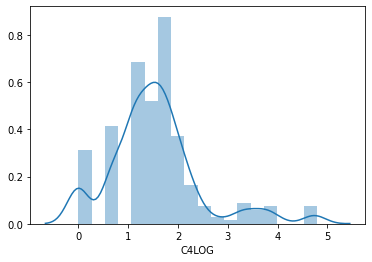

In [17]:
sns.distplot(ASI_Base1['C4LOG'])

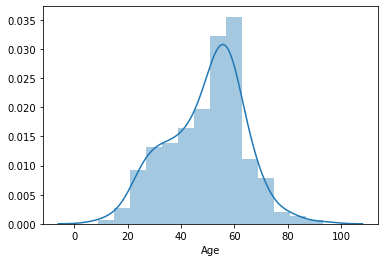

In [18]:
sns.distplot(ASI_Base1['Age'])

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(ASI_Base1)

     Age   C4     C4LOG
0     42    5  1.609438
1     60    7  1.945910
2     49    1  0.000000
3     35    1  0.000000
4     53    3  1.098612
5     53    2  0.693147
6     55    8  2.079442
7     56    6  1.791759
8     24    3  1.098612
9     55    6  1.791759
10    93   10  2.302585
11    55   11  2.397895
12    46    2  0.693147
13    57    5  1.609438
14    46    2  0.693147
15    50    1  0.000000
16    68    3  1.098612
17    28    3  1.098612
18    56    8  2.079442
19    28    4  1.386294
20    35   16  2.772589
21    49    6  1.791759
22    39    3  1.098612
23    60    5  1.609438
24    27    2  0.693147
25    59    5  1.609438
26    43    3  1.098612
27    54    5  1.609438
28    28    3  1.098612
29    33    7  1.945910
30    57    3  1.098612
31    41    3  1.098612
32    57    4  1.386294
33    79    8  2.079442
34    31    2  0.693147
35    46   40  3.688879
36    53    2  0.693147
37    60    5  1.609438
38    69    4  1.386294
39    34    4  1.386294
40    37    3  1

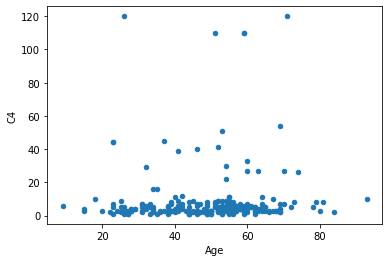

In [20]:
Plot = ASI_Base1.plot.scatter( x = 'Age', y = 'C4')

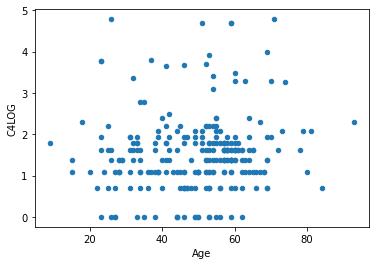

In [21]:
Plot = ASI_Base1.plot.scatter( x = 'Age', y = 'C4LOG')

In [22]:
x = ASI_Base1['Age']
y = ASI_Base1['C4LOG']

In [23]:
model = sm.OLS(y,x).fit()

In [24]:
pred_val = model.fittedvalues.copy()
true_val = ASI_Base1['C4LOG'].values.copy()
residual = true_val - pred_val

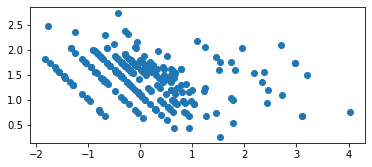

In [25]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [26]:
#This seems to be able to draw a line across it with a couple of outliers.

In [27]:
sms.diagnostic.het_breuschpagan(residual, ASI_Base1[['Age']])

(39.95296875111251, nan, 47.25786633242714, 4.8711846318082525e-11)

In [28]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=0.979072500170498, pvalue=0.32849444264755645)

In [29]:
transformed, _ = boxcox(ASI_Base1['Age'])

(array([ 4., 26., 30., 40., 58., 63., 22.,  5.,  4.,  1.]),
 array([ 11.17628268,  30.79032925,  50.40437582,  70.01842239,
         89.63246896, 109.24651553, 128.86056211, 148.47460868,
        168.08865525, 187.70270182, 207.31674839]),
 <a list of 10 Patch objects>)

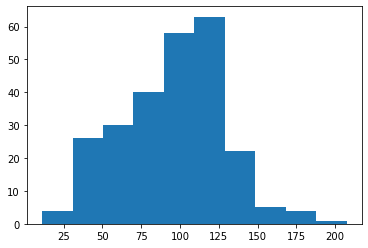

In [30]:
plt.hist(transformed)

In [31]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  C4LOG   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              546.0
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                    5.06e-65
Time:                        21:51:07   Log-Likelihood:                         -361.40
No. Observations:                 253   AIC:                                      724.8
Df Residuals:                     252   BIC:                                      728.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0146      0.001     23.367      0.000       0.013       0.016
==============================================================================
Omnibus:                       42.490   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.847
Skew:                           0.964   Prob(JB):                     3.05e-15
Kurtosis:                       4.619   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# The bottom numbers are not close to 1. Is this going to be a concern?

In [34]:
pred_val1 = model1.fittedvalues.copy()
true_val1 = ASI_Base1['C4LOG'].values.copy()
residual1 = true_val1 - pred_val1

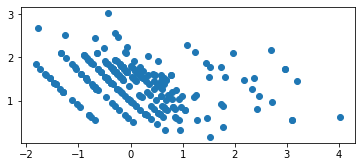

In [35]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val1)

In [36]:
sms.diagnostic.het_breuschpagan(residual1, ASI_Base1[['Age']])

(39.644656994814326, nan, 46.825420080763536, 5.866415765845351e-11)

In [37]:
sms.linear_harvey_collier(model1)

Ttest_1sampResult(statistic=1.5634420917248988, pvalue=0.1192186492030594)

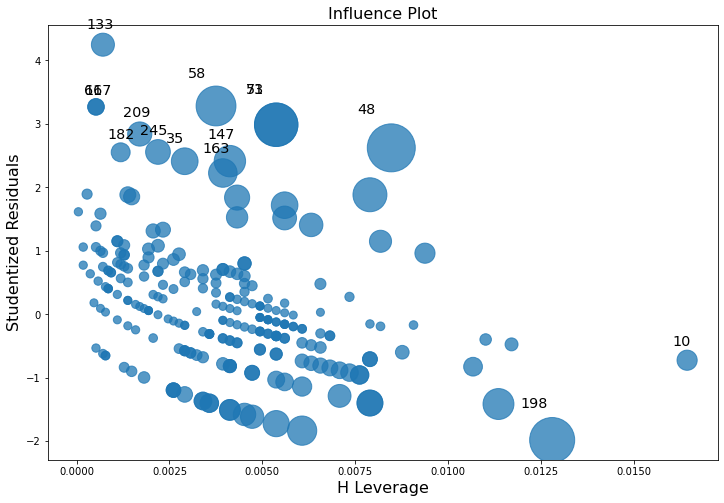

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, alpha = .05, ax = ax, criterion="cooks")

In [39]:
# I am not sure with this graph if this is right or wrong?

In [40]:
infl = model1.get_influence()
print(infl.summary_frame())

       dfb_x1       cooks_d  standard_resid  hat_diag  dffits_internal  \
0    0.022405  5.035607e-04        0.464861  0.002325         0.022440   
1    0.013145  1.734455e-04        0.175499  0.005600         0.013170   
2   -0.079875  6.358049e-03       -1.365013  0.003401        -0.079737   
3   -0.034649  1.201491e-03       -0.899987  0.001481        -0.034663   
4   -0.026723  7.164456e-04       -0.415834  0.004126        -0.026767   
5   -0.052586  2.768901e-03       -0.817489  0.004126        -0.052620   
6    0.032678  1.071114e-03        0.485682  0.004520         0.032728   
7    0.011371  1.297988e-04        0.165345  0.004725         0.011393   
8    0.012591  1.590000e-04        0.523424  0.000580         0.012610   
9    0.013495  1.828077e-04        0.200646  0.004520         0.013521   
10  -0.093682  8.792820e-03       -0.725411  0.016435        -0.093770   
11   0.053951  2.914879e-03        0.801206  0.004520         0.053990   
12  -0.031087  9.689624e-04       -0.5